In [ ]:
# импортируйте нужные библиотеки
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации
random_state = 20

# Генерируем данные
X, y = make_classification(n_samples=4000, n_features=20, n_informative=2, random_state=random_state)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

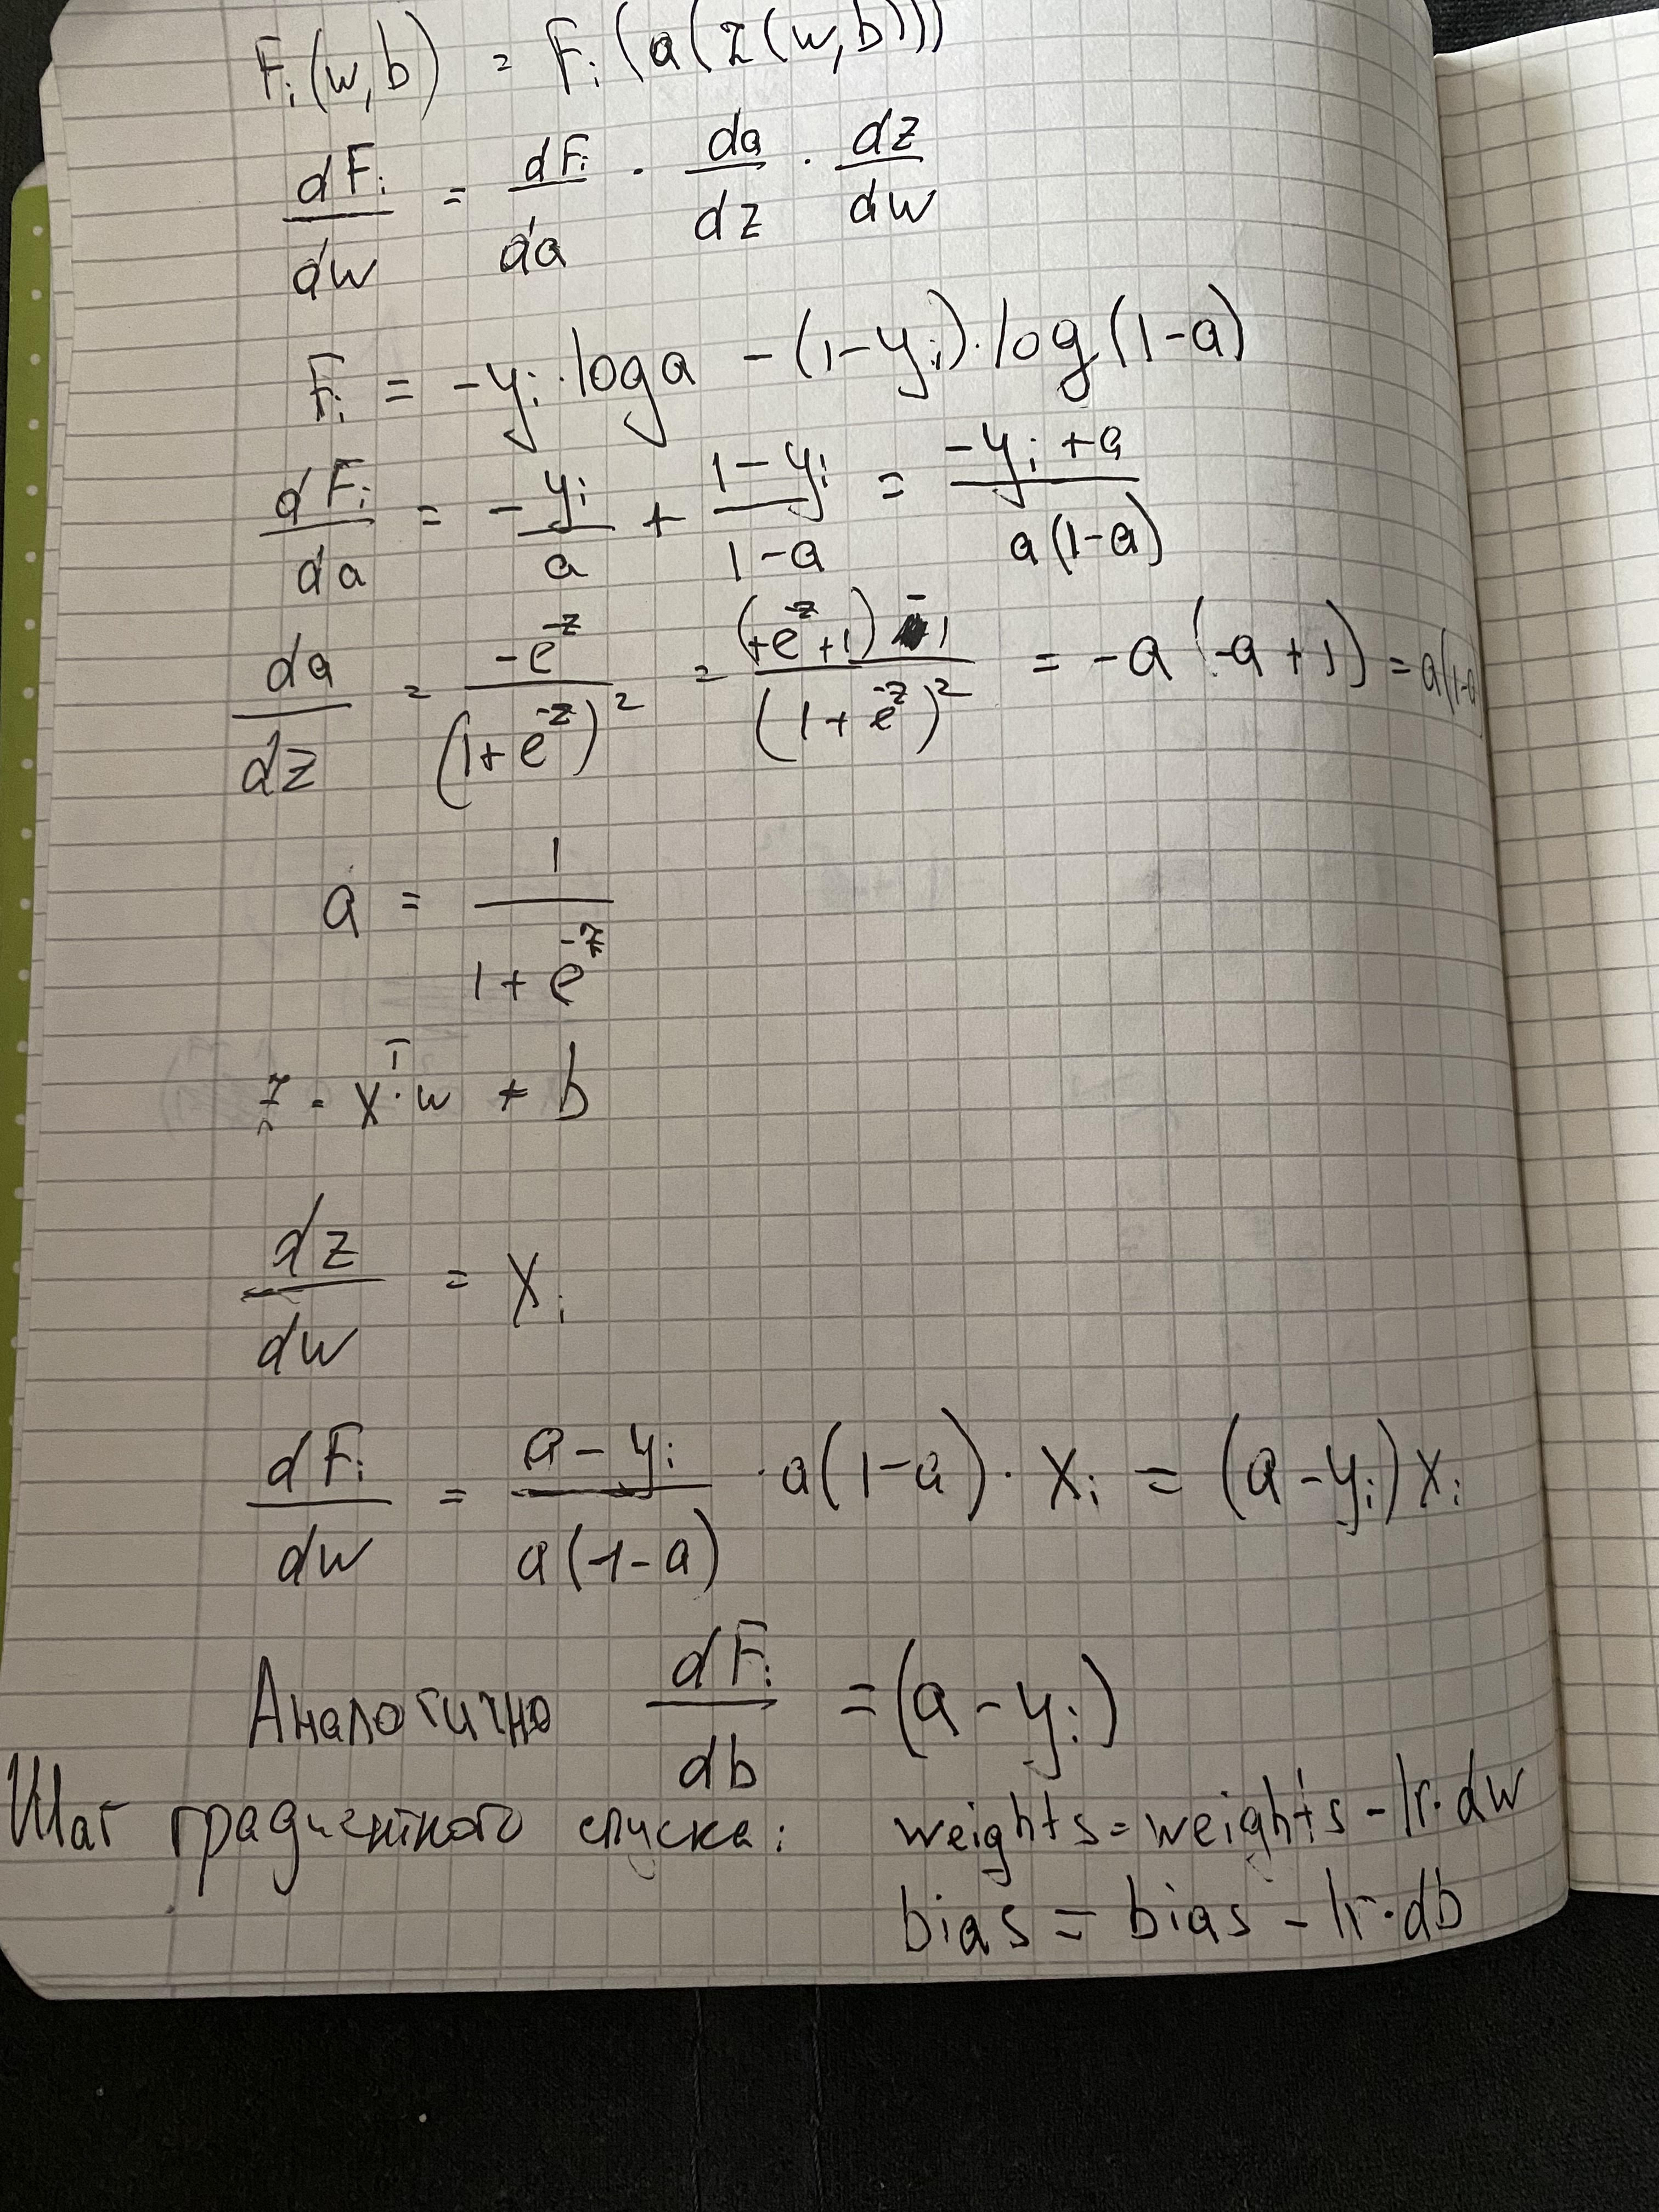

#### Задание №2. Напишите собственную логистическую регрессию

In [ ]:
class MyLogRegression():
    def __init__(self, learning_rate=0.01, epoch=10000):
        self.lr = learning_rate
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = np.dot(X.T, (y_predicted - y)) / n_samples
            db = np.sum(y_predicted - y) / n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [ ]:
# Создаем экземпляры класса логистической регрессии
logreg = LogisticRegression()
mylogreg = MyLogRegression()

# Обучаем модели на обучающей выборке
logreg.fit(X_train, y_train)
mylogreg.fit(X_train, y_train)

# Предсказываем метки классов на тестовой выборке
y_pred = logreg.predict(X_test)
y_pred_my = mylogreg.predict(X_test)

# Оцениваем качество моделей на тестовой выборке
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
accuracy_my = np.mean(y_pred_my == y_test)
print("Accuracy_my:", accuracy_my)

Accuracy: 0.9933333333333333
Accuracy_my: 0.9933333333333333
